In [3]:
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [5]:
Plots.scalefontsizes(1.5)

In [6]:
using LaTeXStrings

In [7]:
include("singledefect.jl")

rho_barrat_tinfty (generic function with 1 method)

In [8]:
function rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2)
    beta = 1./T
    poparray = init_array(Np)
    res = zeros(ensemble);
    dist_energy = Exponential()
    os = zeros(Complex{Float64}, c)
    for i in 1:c
        e1 = rand(dist_energy)
        K = meanK(e1, beta)
        os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
    end
     energies = rand(dist_energy, c)
     e1 = rand(dist_energy)
     Kij = K_sym(e1, beta, energies)
    omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
    res[1] = real(exp(beta*e1)*c/omega_cm1)
    
    for j in 2:ensemble
        for i in 1:c
           e1 = rand(dist_energy)
            K = meanK(e1, beta)
            os[i] =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + c*im*K
        end
         energies = rand(dist_energy, c)
         e1 = rand(dist_energy)
         Kij = K_sym(e1, beta, energies)
        omega_cm1 =  im*(lambda-epsilon2*im)*exp(beta*e1)*c + sum(im*(Kij.*os)./(im*(Kij) .+ os))
        res[j] = real(exp(beta*e1)*c/omega_cm1)
    end
    mean(res)*1/pi
end

rho_barrat_2nd (generic function with 1 method)

In [9]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 0.1;

In [10]:
#lambda_barrat = -linspace(0.,1.,101);
lambda_barrat = -logspace(-4.,0.,101);

In [11]:
rho_infty = [rho_barrat_cinfty(lambda, c, T, ensemble, epsilon, epsilon2) for lambda in lambda_barrat];

In [12]:
#rho_2nd = [rho_barrat_2nd(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [13]:
rho_ba = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

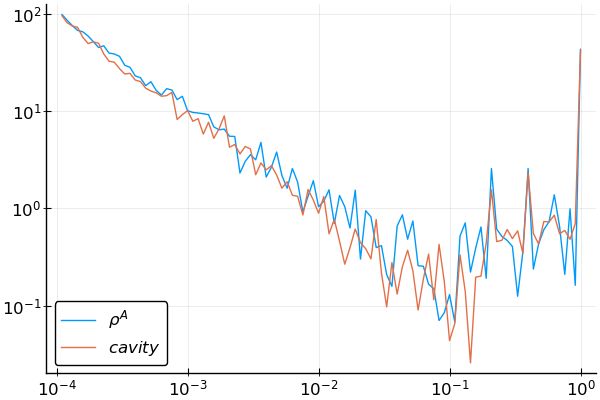

In [16]:
plot(-lambda_barrat[2:end], rho_infty[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba[2:end], label = L"cavity")

In [ ]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 3.;

In [ ]:
lambda_barrat = -logspace(-4.,0.,101);

In [ ]:
rho_infty2 = [rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [ ]:
rho_ba2 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

In [ ]:
plot(-lambda_barrat[2:end], rho_infty2[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba2[2:end], label = L"cavity")

In [ ]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
epsilon2 = 1.e-5
ensemble = Int64(10^5);
c = 5;
T = 1.;

In [ ]:
rho_infty3 = [rho_barrat_cinfty(lambda, c, T, Np, ensemble, nsteps, epsilon2) for lambda in lambda_barrat];

In [ ]:
rho_ba3 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

In [ ]:
plot(-lambda_barrat[2:end], rho_infty3[2:end], label = L"\rho^A", xscale = :log10, yscale = :log10)
plot!(-lambda_barrat[2:end], rho_ba3[2:end], label = L"cavity")